[퇴근후 텐서플로] TensorFlow 입문

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

label: 5


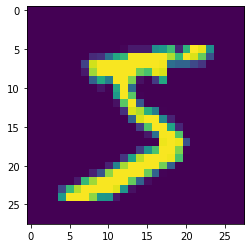

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print("label:",y_train[0])

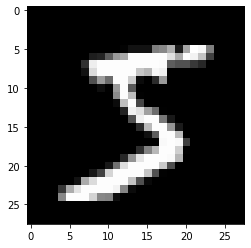

In [5]:
plt.imshow(x_train[0],cmap='gray')

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

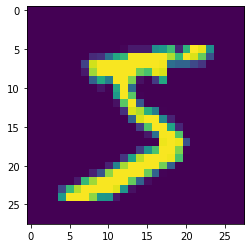

In [6]:
import numpy as np
np.set_printoptions(linewidth = 120)

print(x_train[0])
plt.imshow(x_train[0])

In [7]:
model = Sequential([
            Flatten(input_shape=(28,28)),
            Dense(units=64, activation='relu' ),
            Dense(units=10, activation='softmax')
])
# Flatten 쫙 펼치는 작업을 한다

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 모델 컴파일

In [9]:
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델 학습 (훈련)

In [10]:
model.fit(x_train, y_train,epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 2.5311 - accuracy: 0.7648
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5137 - accuracy: 0.8745
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3591 - accuracy: 0.9103


In [12]:
history = model.fit(x_train, y_train,epochs= 3,batch_size=64)

Epoch 1/3
938/938 [==============================] - 4s 4ms/step - loss: 0.1847 - accuracy: 0.9481
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.1798 - accuracy: 0.9513
Epoch 3/3
938/938 [==============================] - 5s 5ms/step - loss: 0.1735 - accuracy: 0.9517


Text(0, 0.5, 'accuracy')

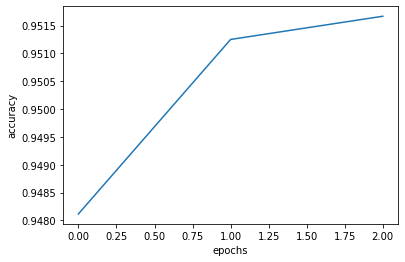

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')